# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [3]:
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast` and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. Use the `index_col` argument to set the first column in the csv file as the index for the dataframe. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [19]:
hamlets = pd.read_csv("hamlets.csv", index_col=0)
print(hamlets)

     language                                               text
1     English  The Tragedie of Hamlet\n                      ...
2      German  Hamlet, Prinz von Dännemark.\n                ...
3  Portuguese  HAMLET\n                             DRAMA EM ...


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [33]:
language, text = hamlets.iloc[0]
counted_text = count_words_fast(text)
num_unique, counts = word_stats(counted_text)
print(counted_text["hamlet"])

97


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [54]:
# write your code here!
data_frame = pd.DataFrame(columns = ("Word", "Length", "Frequency"))
row = 1
for word in counted_text.keys():
    if counted_text[word] > 0:
        freq = "frequent" if counted_text[word] > 10 else ("unique" if counted_text[word] == 1 else "infrequent")       
        data_frame.loc[row] = [word, len(word), freq]
        row += 1

print(len(data_frame[data_frame.Frequency == "unique"]))

    

3348


### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text (defined in Exercise 2).
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [76]:
# write your code here!
sub_data = pd.DataFrame(columns = ("language", "frequency", "mean_word_length", "num_words"))
sub_row = 1
freq = ["frequent", "infrequent", "unique"]
for language, text in hamlets.iloc:
    word_counts = count_words_fast(text)
    freq_dict = {"frequent":0,
                "infrequent":0,
                "unique":0}
    freq_length_dict = {"frequent":0,
                "infrequent":0,
                "unique":0}
    for word in word_counts.keys():
        if word_counts[word] > 10:
            freq_dict["frequent"] += 1
            freq_length_dict["frequent"] += len(word)
        elif word_counts[word] > 1:
            freq_dict["infrequent"] += 1
            freq_length_dict["infrequent"] += len(word)
        elif word_counts[word] == 1:
            freq_dict["unique"] += 1
            freq_length_dict["unique"] += len(word)
    mean_word_length = [
        freq_length_dict["frequent"]/freq_dict["frequent"], 
        freq_length_dict["infrequent"]/freq_dict["infrequent"],
        freq_length_dict["unique"]/freq_dict["unique"]
    ]
    num_words = [
        freq_dict["frequent"], 
        freq_dict["infrequent"],
        freq_dict["unique"]
    ]
    
    sub_data.loc[sub_row] = [language, freq, mean_word_length, num_words]
    sub_row += 1

print(sub_data)
    


    


     language                       frequency  \
1     English  [frequent, infrequent, unique]   
2      German  [frequent, infrequent, unique]   
3  Portuguese  [frequent, infrequent, unique]   

                                    mean_word_length          num_words  
1  [4.371517027863777, 5.825242718446602, 7.00567...  [323, 1442, 3348]  
2  [4.528052805280528, 6.481829573934837, 9.00698...  [303, 1596, 5582]  
3  [4.417624521072797, 6.497869750456482, 8.66977...  [261, 1643, 5357]  


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [78]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)
    
# write your code here!
    

### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

Text(0, 0.5, 'Number of Words')

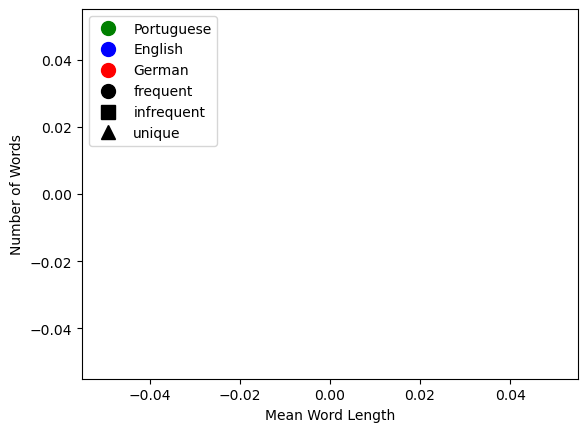

In [86]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
# write your code to display the plot here!